Number of clusters: 2, Davies-Bouldin Index: 2.3110047230178195
Number of clusters: 3, Davies-Bouldin Index: 2.5225926459330146
Number of clusters: 4, Davies-Bouldin Index: 4.211828923633724
Number of clusters: 5, Davies-Bouldin Index: 4.22176289168211
Number of clusters: 6, Davies-Bouldin Index: 2.633267723793074
Number of clusters: 7, Davies-Bouldin Index: 2.119510969591904
Number of clusters: 8, Davies-Bouldin Index: 4.106975273606541
Number of clusters: 9, Davies-Bouldin Index: 5.833590040486136


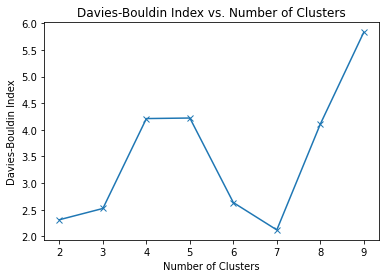

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score  # Import davies_bouldin_score
import skfuzzy as fuzz
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score
#import dataset
from sklearn.datasets import load_iris

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

df = pd.read_csv("file_train_senza_outliers.csv")

X = df.select_dtypes(include=float).values

# z-score, fit and then transform
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

# Set a range of cluster numbers to try
cluster_range = range(2, 10)

davies_bouldin_scores = []

for num_clusters in cluster_range:
    # Perform Fuzzy C-Means clustering
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_scal.T, num_clusters, 2, error=0.005, maxiter=1000)
    
    # Get cluster assignments for each data point
    cluster_membership = np.argmax(u, axis=0)
    
    # Calculate Davies-Bouldin index
    davies_bouldin_idx = davies_bouldin_score(X_scal, cluster_membership)
    davies_bouldin_scores.append(davies_bouldin_idx)

    print(f"Number of clusters: {num_clusters}, Davies-Bouldin Index: {davies_bouldin_idx}")

# Plotting the results
plt.plot(cluster_range, davies_bouldin_scores, marker='x')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()
